In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
pip install WordCloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows',None)
import re
import string
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
# from textblob import TextBlob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare/drugsComTrain_raw.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df.shape

(161297, 7)

In [ ]:
df['condition'].value_counts().head(10)

,count
condition,
Birth Control,28788
Depression,9069
Pain,6145
Anxiety,5904
Acne,5588
Bipolar Disorde,4224
Insomnia,3673
Weight Loss,3609
Obesity,3568


In [ ]:
# plot a pie chart to see the distribution of condition and drugname

In [ ]:
df_train = df[(df['condition']== 'Birth Control')|
 (df['condition']== 'Depression') |
  (df['condition']== 'Pain') |
   (df['condition']== 'Anxiety')|
    (df['condition']== 'Acne')|
     (df['condition']== 'Bipolar Disorde')|
      (df['condition']== 'Insomnia')|
       (df['condition']== 'Weight Loss')|
        (df['condition']== 'Obbesity')|
         (df['condition']== 'ADHD')]

In [ ]:
df_train.shape

(70383, 7)

In [ ]:
condition_counts = df_train['condition'].value_counts()

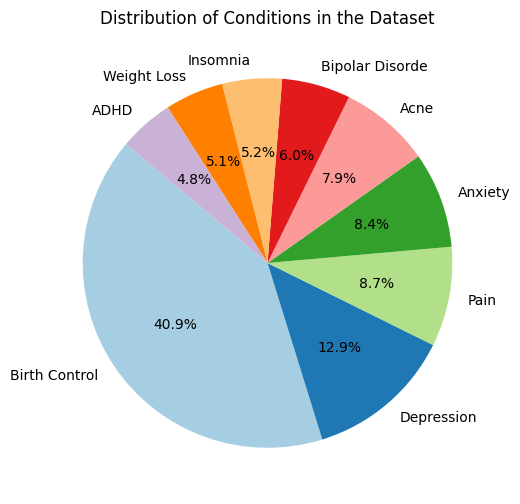

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Conditions in the Dataset')
plt.show()

This is Imbalanced dataset so need to balance it

In [ ]:
# oversampling
# undersampling


In [ ]:
df[(df['condition']== 'pain') & (df['review'].isnull())]
#  (df['gender'] == 'M') & (df['age'].isnull())

,uniqueID,drugName,condition,review,rating,date,usefulCount


In [ ]:
df.isnull().sum()

,0
uniqueID,0
drugName,0
condition,899
review,0
rating,0
date,0
usefulCount,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
uniqueID,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


In [ ]:
df_train = df_train.drop(columns = ['rating','date','usefulCount','uniqueID'])

In [ ]:
df_train.head()

,drugName,condition,review
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m..."


In [ ]:
df_train.isnull().sum()

,0
drugName,0
condition,0
review,0


In [ ]:
df_train.condition = df_train['condition'].astype("category")
df_train.drugName = df_train['drugName'].astype("category")


In [ ]:
df_train.describe()

,drugName,condition,review
count,70383,70383,70383
unique,747,9,47680
top,Etonogestrel,Birth Control,"""Great"""
freq,3314,28788,9


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70383 entries, 1 to 161291
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   drugName   70383 non-null  category
 1   condition  70383 non-null  category
 2   review     70383 non-null  object  
dtypes: category(2), object(1)
memory usage: 1.3+ MB


In [ ]:
birthcontrol = df[(df['condition']== 'Birth Control')]
plt.figure(figsize = (20,20))
wc = WordCloud (max_words = 500 , width = 1200 , height = 800).generate(" ".join(birthcontrol.review))
plt.imshow(wc, interpolation = "nearest")
plt.title ("Word cloud for birth control",fontsize = 14)

In [ ]:
ADHD = df[(df['condition']== 'ADHD')]
plt.figure(figsize = (20,20))
wc = WordCloud (max_words = 500 , width = 1200 , height = 800).generate(" ".join(ADHD.review))
plt.imshow(wc, interpolation = "bilinear")
plt.title ("Word cloud for ADHD",fontsize = 14)

In [ ]:
df_train['review'].head()

In [ ]:
#remove html tags
#lowercasing
#remove punc
#remove \r\n
#remove [&#039;]
#remove stopwords
#correct spelling
#word tokenization
#lemmatization


In [ ]:
def remove_html_tags(data):
  pattern = re.compile('<.*?>')  #compile
  return pattern.sub(r'',data)   #substitite

df_train['review'] = df_train['review'].apply(remove_html_tags)

In [ ]:
df_train['review'].head()

In [ ]:
def lowercasing_data(data):
  return data.lower()

df_train['review'] = df_train['review'].apply(lowercasing_data)

In [ ]:
df_train['review'].head()

In [ ]:
def remove_punc(data):
  return data.translate(str.maketrans('','',string.punctuation))
  punctuation = string.punctuation
  # for i in punctuation:
  #   data = data.replace(i," ")
  #   return data

df_train['review'] = df_train['review'].apply(remove_punc)

In [ ]:
df_train['review'][11]

In [ ]:
df_train['review'].head()

In [ ]:
def remove_newline(data):
  patterns = re.compile(r'\r\n')
  return patterns.sub(r'',data)

df_train['review'] = df_train['review'].apply(remove_newline)

In [ ]:
df_train['review'][11]

In [ ]:
def remove_039(data):
  patterns = re.compile(r'[&#039;]')
  return patterns.sub(r'',data)

df_train['review'] = df_train['review'].apply(remove_039)

In [ ]:
df_train['review'][1]

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
stop_words = stopwords.words('english')
new_words =[]
def remove_stopwords(data):

  for word in data.split():
    if word in stop_words:
      new_words.append('')
    else:
      new_words.append(word)

  x = new_words[:]
  new_words.clear()
  return " ".join(x)

df_train['review'] = df_train['review'].apply(remove_stopwords)


In [ ]:
df_train['review'][1]

In [ ]:
# #textblob
# def correct_spelling(data):
#   return str(TextBlob(data).correct())

# df_train['review'] = df_train['review'].apply(correct_spelling)

In [ ]:
import nltk
nltk.download('punkt_tab')

In [ ]:
def word_tokenizer(data):
  tokens = word_tokenize(data)
  return tokens

df_train['review'] = df_train['review'].apply(word_tokenizer)

In [ ]:
df_train['review'].head()

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
#lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatization(data):
  for i in range(len(data)):
    data[i] = lemmatizer.lemmatize(data[i],pos = 'v')
  return data

In [ ]:
df_train['review'] = df_train['review'].apply(lemmatization)

In [ ]:
df_train['review'].head()

In [ ]:
#need to pass a string to the tfidf but we had lemmatization output as list so convert the list to string

In [ ]:
df_train['review'] = df_train['review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [ ]:
df_train['review'].head()

In [ ]:
#reviews are input X
#condition should be output Y

In [ ]:
# text preprocessing    : done
# bag of words or tfidf vectorizer :done
# train a model
# make prediction
# confusion matrix
# plot confusion matrix

In [ ]:
X = df_train['review']
y = df_train['condition']

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
X_resampled , y_resampled = ros.fit_resample(X_train.values.reshape(-1,1),y_train)

In [ ]:
resampled_counts = pd.Series(y_resampled).value_counts()

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(resampled_counts, labels=resampled_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Classes in Resampled Dataset')
plt.show()

In [ ]:
X_resampled = [x[0] for x in X_resampled]

**1** **USING** **TFIDF**



In [ ]:
vectorize = TfidfVectorizer(stop_words = 'english')
X_train_tfidf = vectorize.fit_transform(X_resampled)
X_test_tfidf = vectorize.transform(X_test)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf,y_resampled)
y_pred = nb_model.predict(X_test_tfidf)

In [ ]:
y_pred

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_tfidf, y_resampled)
y_pred = log_reg_model.predict(X_test_tfidf)



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train_tfidf, y_resampled)
# y_pred = rf_model.predict(X_test_tfidf)

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train_tfidf, y_resampled)
# y_pred = knn_model.predict(X_test_tfidf)


In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_tfidf, y_resampled)
y_pred = lgb_model.predict(X_test_tfidf)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 32.964935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390751
[LightGBM] [Info] Number of data points in the train set: 206658, number of used features: 8982
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.17%


In [ ]:
# pip install xgboost

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# import xgboost as xgb

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the training labels and transform the test labels
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Initialize the XGBoost model
# xgb_model = xgb.XGBClassifier()

# # Train the model with encoded labels
# xgb_model.fit(X_train_tfidf, y_train_encoded)

# # Make predictions using the test set
# y_pred_encoded = xgb_model.predict(X_test_tfidf)

# # Convert predictions back to the original string labels
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# # Evaluate the predictions (e.g., print accuracy)
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
# print(f'Accuracy: {accuracy * 100:.2f}%')


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, y_resampled)

# Step 5: Make Predictions on Test Set
y_pred = clf.predict(X_test_tfidf)

# Step 6: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.40%


In [ ]:
# from sklearn.svm import SVC
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train_tfidf, y_resampled)y
# y_pred = svm_model.predict(X_test_tfidf)

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

**2.USING BAG_OF_WORDS**

In [ ]:
X = df_train['review']
y = df_train['condition']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
X_resampled1 , y_resampled1 = ros.fit_resample(X_train.values.reshape(-1,1),y_train)

In [ ]:
X_resampled1 = [x[0] for x in X_resampled1]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_resampled1)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_vec, y_resampled1)
y_pred = log_reg_model.predict(X_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.52%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_resampled1)
y_pred = rf_model.predict(X_test_vec)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.11%


In [ ]:
X_train_vec = X_train_vec.astype('float32')
X_test_vec = X_test_vec.astype('float32')


import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_vec, y_resampled1)
y_pred = lgb_model.predict(X_test_vec)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 39.222566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24056
[LightGBM] [Info] Number of data points in the train set: 206658, number of used features: 8982
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.43%


In [ ]:
#passiveaggressiveclassifier

In [ ]:
# clf.fit(X_train_vec, y_train)

# # Step 5: Make Predictions on Test Set
# y_pred = clf.predict(X_test_vec)

# # Step 6: Evaluate the Model's Performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
clf.fit(X_train_vec, y_resampled1)

# Step 5: Make Predictions on Test Set
y_pred = clf.predict(X_test_vec)

# Step 6: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 89.41%


In [ ]:
# n-grams

In [ ]:
vectorize = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))
X_train_tfidf = vectorize.fit_transform(X_resampled)
X_test_tfidf = vectorize.transform(X_test)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, y_resampled)

# Step 5: Make Predictions on Test Set
y_pred = clf.predict(X_test_tfidf)

# Step 6: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.54%


In [ ]:
vectorize = TfidfVectorizer(stop_words = 'english', ngram_range = (1,3))
X_train_tfidf = vectorize.fit_transform(X_resampled)
X_test_tfidf = vectorize.transform(X_test)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, y_resampled)

# Step 5: Make Predictions on Test Set
y_pred = clf.predict(X_test_tfidf)

# Step 6: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.49%


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


                 precision    recall  f1-score   support

           ADHD       0.93      0.92      0.93       688
           Acne       0.96      0.95      0.95      1046
        Anxiety       0.84      0.82      0.83      1232
Bipolar Disorde       0.92      0.83      0.88       851
  Birth Control       0.98      0.99      0.98      5826
     Depression       0.84      0.88      0.86      1765
       Insomnia       0.87      0.90      0.89       743
           Pain       0.96      0.94      0.95      1178
    Weight Loss       0.96      0.97      0.97       748

       accuracy                           0.93     14077
      macro avg       0.92      0.91      0.91     14077
   weighted avg       0.94      0.93      0.93     14077



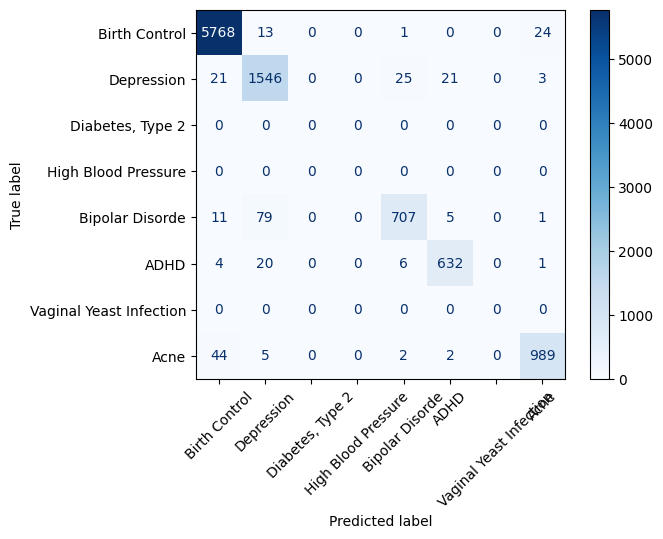

In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# import matplotlib.pyplot as plt

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure', 'Bipolar Disorde', 'ADHD', 'Vaginal Yeast Infection', 'Acne'])

# # Create a ConfusionMatrixDisplay instance and plot
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure', 'Bipolar Disorde', 'ADHD', 'Vaginal Yeast Infection', 'Acne'])
# disp.plot(cmap=plt.cm.Blues)
# plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
# plt.show()


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming clf is your classifier, and X_train_tfidf and y_resampled are your data
f1_scores = cross_val_score(clf, X_train_tfidf, y_resampled, cv=5, scoring='f1_macro')
print(f"F1 Macro Scores: {f1_scores}")
print(f"Mean F1 Macro Score: {f1_scores.mean()}")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')  # Change 'macro' as needed
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1}")
